<a href="https://colab.research.google.com/github/Trading-com-Dados/codigos_videos/blob/main/20220124_Matriz_Risco_vs_Retorno_YouTubeipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vídeo foi ao ar no YouTube no dia 24/01/2022

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 884 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Obtenção dos dados das ações

In [ ]:
ativos = ['VIIA3.SA',	'JHSF3.SA',	'PETZ3.SA',	'B3SA3.SA',
 'EZTC3.SA',	'MGLU3.SA',	'MULT3.SA',	'POSI3.SA',
 'BEEF3.SA',	'CYRE3.SA',	'NTCO3.SA',	'LREN3.SA',
 'MRVE3.SA',	'YDUQ3.SA',	'HAPV3.SA']

In [ ]:
inicio = '2021-01-01'
fim = '2022-01-22'

In [ ]:
yf.download('WEGE3.SA', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    36.886272
2021-01-05    39.150265
2021-01-06    40.188335
2021-01-07    41.849258
2021-01-08    44.380180
                ...    
2022-01-17    30.350000
2022-01-18    30.540001
2022-01-19    30.500000
2022-01-20    30.740000
2022-01-21    30.610001
Name: Adj Close, Length: 262, dtype: float64

In [ ]:
df = pd.DataFrame()

In [ ]:
for ativo in ativos:
  df[ativo] = yf.download(ativo, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA,MGLU3.SA,MULT3.SA,POSI3.SA,BEEF3.SA,CYRE3.SA,NTCO3.SA,LREN3.SA,MRVE3.SA,YDUQ3.SA,HAPV3.SA
Date,,,,,,,,,,,,,,,
2021-01-04,16.170000,6.783157,18.540487,19.180500,40.632851,25.181740,21.963440,4.886387,9.044784,27.284336,51.990002,37.512306,18.006948,33.465923,14.973457
2021-01-05,16.219999,6.710220,18.550467,19.218246,39.658440,24.742058,21.992661,4.721569,8.864610,26.757797,51.689999,37.147934,17.901197,33.633251,14.585181
2021-01-06,15.490000,6.445823,17.602486,18.903706,38.050667,23.442999,21.057632,4.702178,8.738486,26.068508,49.099998,35.281654,17.372429,32.294621,14.047571
2021-01-07,15.080000,6.400237,17.482742,19.432131,37.339344,23.143217,21.038153,4.508274,8.693442,26.231256,48.480000,36.214798,17.257063,32.698177,14.216820
2021-01-08,15.530000,6.746689,18.091444,19.718361,39.405090,23.822723,21.797863,4.653702,8.765512,27.485378,50.720001,38.303253,18.449192,33.810425,16.735210


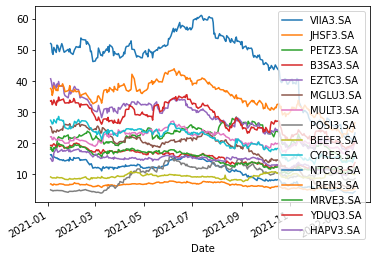

In [ ]:
df.plot();

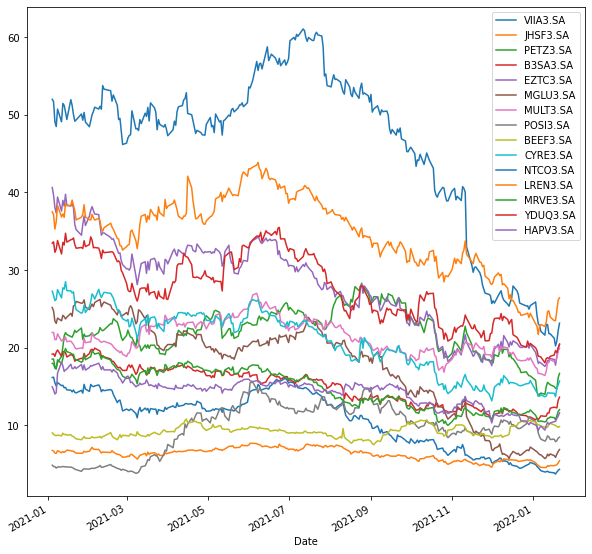

In [ ]:
df.plot(figsize = (10,10));

In [ ]:
df.iloc[0]

VIIA3.SA    16.170000
JHSF3.SA     6.783157
PETZ3.SA    18.540487
B3SA3.SA    19.180500
EZTC3.SA    40.632851
MGLU3.SA    25.181740
MULT3.SA    21.963440
POSI3.SA     4.886387
BEEF3.SA     9.044784
CYRE3.SA    27.284336
NTCO3.SA    51.990002
LREN3.SA    37.512306
MRVE3.SA    18.006948
YDUQ3.SA    33.465923
HAPV3.SA    14.973457
Name: 2021-01-04 00:00:00, dtype: float64

In [ ]:
normalizado = df/df.iloc[0]

In [ ]:
normalizado.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA,MGLU3.SA,MULT3.SA,POSI3.SA,BEEF3.SA,CYRE3.SA,NTCO3.SA,LREN3.SA,MRVE3.SA,YDUQ3.SA,HAPV3.SA
Date,,,,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.003092,0.989247,1.000538,1.001968,0.976019,0.982540,1.001330,0.966270,0.980080,0.980702,0.994230,0.990287,0.994127,1.005000,0.974069
2021-01-06,0.957947,0.950269,0.949408,0.985569,0.936451,0.930952,0.958758,0.962302,0.966135,0.955439,0.944412,0.940535,0.964763,0.965000,0.938165
2021-01-07,0.932591,0.943548,0.942949,1.013119,0.918945,0.919048,0.957871,0.922619,0.961155,0.961404,0.932487,0.965411,0.958356,0.977059,0.949468
2021-01-08,0.960421,0.994624,0.975780,1.028042,0.969784,0.946032,0.992461,0.952381,0.969124,1.007368,0.975572,1.021085,1.024560,1.010294,1.117658


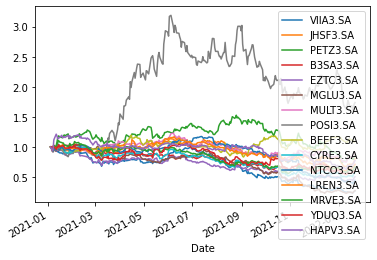

In [ ]:
normalizado.plot();

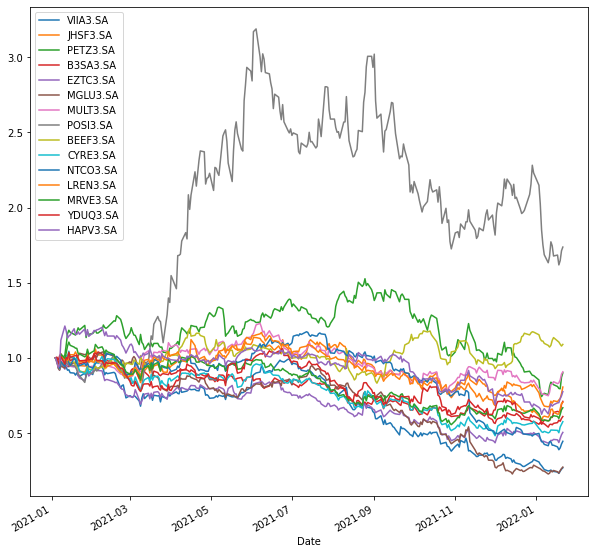

In [ ]:
normalizado.plot(figsize = (10,10));

# 3. Cálculo dos retornos

In [ ]:
retornos_diarios = df.pct_change()

In [ ]:
retornos_diarios.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA,MGLU3.SA,MULT3.SA,POSI3.SA,BEEF3.SA,CYRE3.SA,NTCO3.SA,LREN3.SA,MRVE3.SA,YDUQ3.SA,HAPV3.SA
Date,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981,-0.017460,0.001330,-0.033730,-0.019920,-0.019298,-0.005770,-0.009713,-0.005873,0.005000,-0.025931
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040540,-0.052504,-0.042515,-0.004107,-0.014228,-0.025760,-0.050106,-0.050239,-0.029538,-0.039801,-0.036860
2021-01-07,-0.026469,-0.007072,-0.006803,0.027954,-0.018694,-0.012788,-0.000925,-0.041237,-0.005155,0.006243,-0.012627,0.026448,-0.006641,0.012496,0.012048
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324,0.029361,0.036111,0.032258,0.008290,0.047810,0.046205,0.057669,0.069081,0.034016,0.177142


In [ ]:
retornos_diarios.dropna()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA,MGLU3.SA,MULT3.SA,POSI3.SA,BEEF3.SA,CYRE3.SA,NTCO3.SA,LREN3.SA,MRVE3.SA,YDUQ3.SA,HAPV3.SA
Date,,,,,,,,,,,,,,,
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981,-0.017460,0.001330,-0.033730,-0.019920,-0.019298,-0.005770,-0.009713,-0.005873,0.005000,-0.025931
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040540,-0.052504,-0.042515,-0.004107,-0.014228,-0.025760,-0.050106,-0.050239,-0.029538,-0.039801,-0.036860
2021-01-07,-0.026469,-0.007072,-0.006803,0.027954,-0.018694,-0.012788,-0.000925,-0.041237,-0.005155,0.006243,-0.012627,0.026448,-0.006641,0.012496,0.012048
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324,0.029361,0.036111,0.032258,0.008290,0.047810,0.046205,0.057669,0.069081,0.034016,0.177142
2021-01-11,-0.026401,-0.037838,0.045229,-0.041155,-0.045747,-0.014681,-0.042895,0.002083,-0.012333,-0.038662,-0.031940,-0.038283,-0.026055,-0.051237,0.084625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,-0.017632,-0.008247,-0.014436,0.011457,-0.005911,-0.033175,-0.015143,0.003659,-0.019474,-0.003524,-0.026147,-0.020025,-0.008115,0.008995,0.018429
2022-01-18,-0.038462,0.016632,-0.015979,-0.004045,-0.040000,-0.037582,0.005492,-0.038882,-0.006951,-0.030410,-0.046632,0.000426,-0.021818,0.029365,0.001905
2022-01-19,0.066667,0.012270,-0.003383,-0.004062,0.064189,0.071307,0.024031,0.017699,-0.013000,0.075857,0.031127,0.057447,0.044610,-0.013245,0.038023


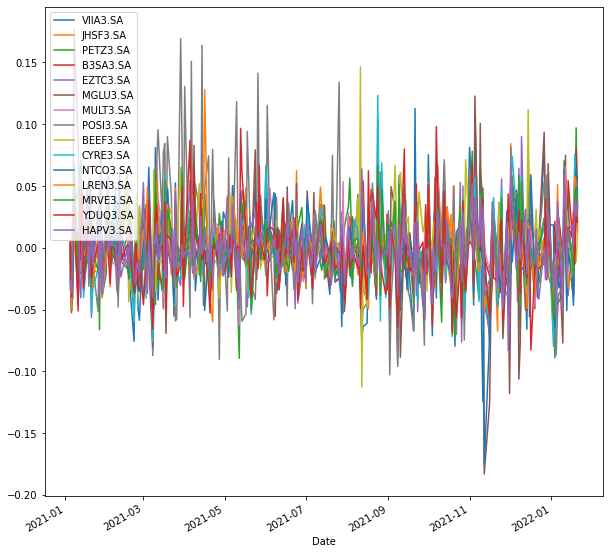

In [ ]:
retornos_diarios.plot(figsize = (10,10));

# 4. Criando data frame com retorno vs. risco

In [ ]:
retornos_diarios.std()

VIIA3.SA    0.035225
JHSF3.SA    0.026818
PETZ3.SA    0.029269
B3SA3.SA    0.023761
EZTC3.SA    0.030218
MGLU3.SA    0.036569
MULT3.SA    0.023912
POSI3.SA    0.045299
BEEF3.SA    0.025431
CYRE3.SA    0.029698
NTCO3.SA    0.026087
LREN3.SA    0.025009
MRVE3.SA    0.025313
YDUQ3.SA    0.029120
HAPV3.SA    0.026613
dtype: float64

In [ ]:
volatilidade = pd.DataFrame(retornos_diarios.std(), columns=['Vol'])

retornos_medios = pd.DataFrame(retornos_diarios.mean(), columns=['Retornos'])

In [ ]:
volatilidade

,Vol
VIIA3.SA,0.035225
JHSF3.SA,0.026818
PETZ3.SA,0.029269
B3SA3.SA,0.023761
EZTC3.SA,0.030218
MGLU3.SA,0.036569
MULT3.SA,0.023912
POSI3.SA,0.045299
BEEF3.SA,0.025431
CYRE3.SA,0.029698


In [ ]:
retornos_medios

,Retornos
VIIA3.SA,-0.004398
JHSF3.SA,-0.000467
PETZ3.SA,0.000026
B3SA3.SA,-0.001023
EZTC3.SA,-0.002163
MGLU3.SA,-0.004271
MULT3.SA,-0.000086
POSI3.SA,0.003116
BEEF3.SA,0.000648
CYRE3.SA,-0.001673


In [ ]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [ ]:
risco_retorno

,Retornos,Vol
VIIA3.SA,-0.004398,0.035225
JHSF3.SA,-0.000467,0.026818
PETZ3.SA,0.000026,0.029269
B3SA3.SA,-0.001023,0.023761
EZTC3.SA,-0.002163,0.030218
MGLU3.SA,-0.004271,0.036569
MULT3.SA,-0.000086,0.023912
POSI3.SA,0.003116,0.045299
BEEF3.SA,0.000648,0.025431
CYRE3.SA,-0.001673,0.029698


# 5. Plotando gráfico de retorno vs. risco

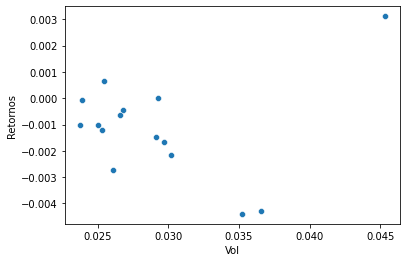

In [ ]:
sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Retornos')

In [ ]:
risco_retorno.shape[0]

15

In [ ]:
range(risco_retorno.shape[0])

range(0, 15)

In [ ]:
risco_retorno.index

Index(['VIIA3.SA', 'JHSF3.SA', 'PETZ3.SA', 'B3SA3.SA', 'EZTC3.SA', 'MGLU3.SA',
       'MULT3.SA', 'POSI3.SA', 'BEEF3.SA', 'CYRE3.SA', 'NTCO3.SA', 'LREN3.SA',
       'MRVE3.SA', 'YDUQ3.SA', 'HAPV3.SA'],
      dtype='object')

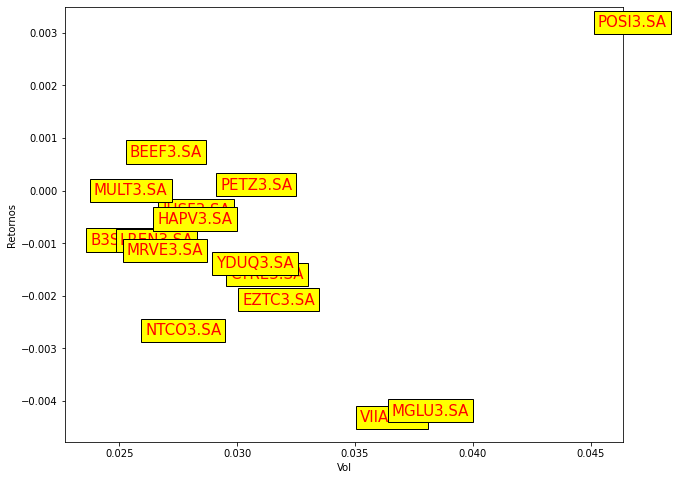

In [ ]:
plt.subplots(figsize = (10,8))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Retornos')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i] , y = risco_retorno.Retornos[i], s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))